In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [20]:
df = pd.read_csv('data/airlines.csv')
df.head()

,Airline,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
0,American West,4.36,81.9
1,United,4.00,80.9
2,Southwest,4.42,78.4
3,US Airways,7.16,78.3
4,Continental,4.62,75.7


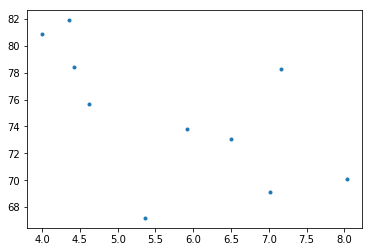

In [54]:
X = df['Mishandled baggage (per 1000 passengers)']
Y = df['Percentage On Time Arrivals']
plt.plot(X, Y, '.')


In [28]:
# Create an empty model
model = LinearRegression()
# Choose the response variable, which in this case is y
y = df['Percentage On Time Arrivals']
# Choose the predictor variable, which in this case is X:
X=df.drop(['Airline', 'Percentage On Time Arrivals'], axis=1)
# Fit the model to the full dataset
model.fit(X, y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

b:  87.20288782505382
m:  [-2.15244604]


In [59]:
theta0, theta1 = 0, 0 # initial guesses
theta0_temp, theta1_temp = 1, 1 #so we can compare previous and new values
                            # make sure they are different than theta0, theta1 at the start
alpha = 0.05 #learning rate
tolerance = 0.0001 #stop when the difference between our old and new estimate is less than this
m = len(X)
while(np.sqrt((theta0_temp - theta0)**2+(theta0_temp - theta0)**2) > tolerance):
    theta0_temp = theta0
    theta1_temp = theta1
    theta0_deriv = 0
    theta1_deriv = 0
    for i in range(m):
        theta0_deriv += theta0+theta1*X[i]-Y[i]
        theta1_deriv += (theta0+theta1*X[i]-Y[i])*X[i]
    theta0 = theta0-alpha*theta0_deriv/m
    theta1 = theta1-alpha*theta1_deriv/m
print(f"b:{theta0}, m:{theta1}")


b:87.17431673066372, m:-2.1477131931082094
